In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
x=pd.read_csv("/kaggle/input/videogames-sales-dataset/Video_Games_Sales_as_at_22_Dec_2016.csv")
x.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       7590 non-null   float64
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(10), object(6)
memory usage: 2.0+ MB


In [4]:
x.describe()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count
count,16450.000000,16719.000000,16719.000000,16719.000000,16719.000000,16719.000000,8137.000000,8137.000000,7590.000000,7590.000000
mean,2006.487356,0.263330,0.145025,0.077602,0.047332,0.533543,68.967679,26.360821,7.125046,162.229908
std,5.878995,0.813514,0.503283,0.308818,0.186710,1.547935,13.938165,18.980495,1.500006,561.282326
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,0.000000,4.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000,60.000000,12.000000,6.400000,10.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000,71.000000,21.000000,7.500000,24.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,0.470000,79.000000,36.000000,8.200000,81.000000
max,2020.000000,41.360000,28.960000,10.220000,10.570000,82.530000,98.000000,113.000000,9.700000,10665.000000


# First start with reducing the size of data

In [5]:
x['Year_of_Release'].unique()

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2016., 2003., 1986., 2000.,   nan, 1995., 1991., 1981., 1987.,
       1980., 1983., 2020., 2017.])

In [6]:
x['Year_of_Release']=x['Year_of_Release'].fillna(2006).astype('int')

In [7]:
x['Critic_Score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 35., 41., 36., 28., 31., 27., 26., 19., 23.,
       24., 21., 17., 22., 13.])

We gonna fill the null values with mean of the column

In [8]:
x['Critic_Score']=x['Critic_Score'].fillna(68).astype(int)

In [9]:
x['Critic_Count'].unique()

array([ 51.,  nan,  73.,  65.,  41.,  80.,  64.,  63.,  45.,  33.,  50.,
        58.,  62.,  37.,  54.,  81.,  89.,  21., 100.,  39.,  56.,  66.,
        57.,  86.,  74.,  16.,  82.,  67.,  29.,  15.,  70.,  99.,  20.,
        87.,  23.,  24.,  10.,  27.,  42.,  91.,  53.,  75.,  46.,  84.,
        38.,  12.,  90.,  97.,  44., 105.,  77.,  68.,  28.,  94.,  96.,
        61.,  22.,  88.,  47.,  98.,  85.,  13.,   8.,  95.,  17.,  35.,
        19.,  48.,  14., 113.,  83.,  72.,  30.,  69.,  76.,  18.,  34.,
        40., 101.,   9.,  32.,  78.,  36.,  25.,  59.,  31.,  79.,  26.,
        49.,  60.,  11.,  43., 107.,   7.,  71.,  55.,  52.,  92.,   4.,
        93.,   5.,   6., 103., 102., 106.,   3., 104.])

In [10]:
x['Critic_Count']=x['Critic_Count'].fillna(26).astype(int)

In [11]:
x['Genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy', nan], dtype=object)

In [12]:
x['Genre']=x['Genre'].fillna('Sports').astype('category')

In [13]:
x['Rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [14]:
x['Rating']=x['Rating'].astype('category')

In [15]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Name             16717 non-null  object  
 1   Platform         16719 non-null  object  
 2   Year_of_Release  16719 non-null  int64   
 3   Genre            16719 non-null  category
 4   Publisher        16665 non-null  object  
 5   NA_Sales         16719 non-null  float64 
 6   EU_Sales         16719 non-null  float64 
 7   JP_Sales         16719 non-null  float64 
 8   Other_Sales      16719 non-null  float64 
 9   Global_Sales     16719 non-null  float64 
 10  Critic_Score     16719 non-null  int64   
 11  Critic_Count     16719 non-null  int64   
 12  User_Score       7590 non-null   float64 
 13  User_Count       7590 non-null   float64 
 14  Developer        10096 non-null  object  
 15  Rating           9950 non-null   category
dtypes: category(2), float64(7), int64(3), ob

In [16]:
m=x.duplicated(['Name','Platform','Year_of_Release','Genre','Publisher','NA_Sales','EU_Sales','JP_Sales','Other_Sales','Global_Sales','Critic_Score','Critic_Count','User_Score','User_Count','Developer','Rating'])

In [17]:
x[m]

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating


**Hence no duplicate values**

In [18]:
x.isnull().sum()

Name                  2
Platform              0
Year_of_Release       0
Genre                 0
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score          0
Critic_Count          0
User_Score         9129
User_Count         9129
Developer          6623
Rating             6769
dtype: int64

In [19]:
x.dropna(inplace=True,ignore_index=True)

hence No null values 

Top 5 games with most global sales

In [20]:
x.sort_values('Global_Sales',ascending=False,inplace=True)

In [21]:
x.head(5)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76,51,8.0,322.0,Nintendo,E
1,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82,73,8.3,709.0,Nintendo,E
2,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80,73,8.0,192.0,Nintendo,E
3,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89,65,8.5,431.0,Nintendo,E
4,Wii Play,Wii,2006,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58,41,6.6,129.0,Nintendo,E


In [22]:
x.shape

(7499, 16)

In [23]:
x.ndim

2

Find out games release between year (2005-2006)

In [24]:
Z=x['Year_of_Release'].between(2005,2006)


In [25]:
x[Z].sort_values('Year_of_Release',ignore_index=True)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Shrek SuperSlam,GC,2005,Action,Activision,0.17,0.04,0.00,0.01,0.22,70,11,7.8,6.0,Shaba Games,E10+
1,Darkwatch,XB,2005,Shooter,Ubisoft,0.16,0.05,0.00,0.01,0.21,75,43,8.1,21.0,High Moon Studios,M
2,Pac-Man World 3,PS2,2005,Platform,Namco Bandai Games,0.10,0.08,0.00,0.03,0.21,63,22,5.2,13.0,Blitz Games,E
3,Teenage Mutant Ninja Turtles 3: Mutant Nightmare,PS2,2005,Action,Konami Digital Entertainment,0.10,0.08,0.00,0.03,0.20,53,20,7.0,10.0,KCE Studios,E10+
4,Ridge Racer 6,X360,2005,Racing,Namco Bandai Games,0.10,0.02,0.07,0.01,0.20,74,65,7.1,28.0,Namco,E
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1251,Scarface: Money. Power. Respect.,PSP,2006,Strategy,Vivendi Games,0.15,0.00,0.00,0.01,0.16,58,12,3.1,15.0,Radical Entertainment,M
1252,Eragon,DS,2006,Action,Vivendi Games,0.13,0.02,0.00,0.01,0.16,63,17,7.6,13.0,Amaze Entertainment,T
1253,Culdcept SAGA,X360,2006,Role-Playing,Namco Bandai Games,0.12,0.00,0.03,0.01,0.16,75,33,8.7,49.0,"Omiya Soft, Jamsworks",T
1254,Field Commander,PSP,2006,Strategy,Sony Online Entertainment,0.14,0.00,0.00,0.01,0.16,77,53,7.8,31.0,"Sony Online Entertainment, Mind Control Software",T


In [26]:
x['Rating'].nunique()   # number of unique values

8

In [27]:
x

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76,51,8.0,322.0,Nintendo,E
1,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82,73,8.3,709.0,Nintendo,E
2,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80,73,8.0,192.0,Nintendo,E
3,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89,65,8.5,431.0,Nintendo,E
4,Wii Play,Wii,2006,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58,41,6.6,129.0,Nintendo,E
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7409,Madden NFL 13,PS3,2012,Sports,Electronic Arts,0.00,0.01,0.00,0.00,0.01,83,22,5.5,101.0,EA Tiburon,E
7408,Monster Rancher Advance 2,GBA,2002,Simulation,Tecmo Koei,0.01,0.00,0.00,0.00,0.01,79,5,9.4,9.0,"Tecmo, Graphic Research",E
7407,Serious Sam II,PC,2005,Shooter,Take-Two Interactive,0.00,0.01,0.00,0.00,0.01,74,31,7.0,152.0,Croteam,M
7406,Impossible Creatures,PC,2002,Strategy,Microsoft Game Studios,0.00,0.01,0.00,0.00,0.01,72,30,8.0,39.0,Relic,T


In [28]:
x['Genre'].unique()

['Sports', 'Racing', 'Platform', 'Misc', 'Action', ..., 'Fighting', 'Simulation', 'Role-Playing', 'Adventure', 'Strategy']
Length: 12
Categories (12, object): ['Action', 'Adventure', 'Fighting', 'Misc', ..., 'Shooter', 'Simulation', 'Sports', 'Strategy']

<Axes: title={'center': 'Sales by Genre'}, xlabel='Genre', ylabel='Global_Sales'>

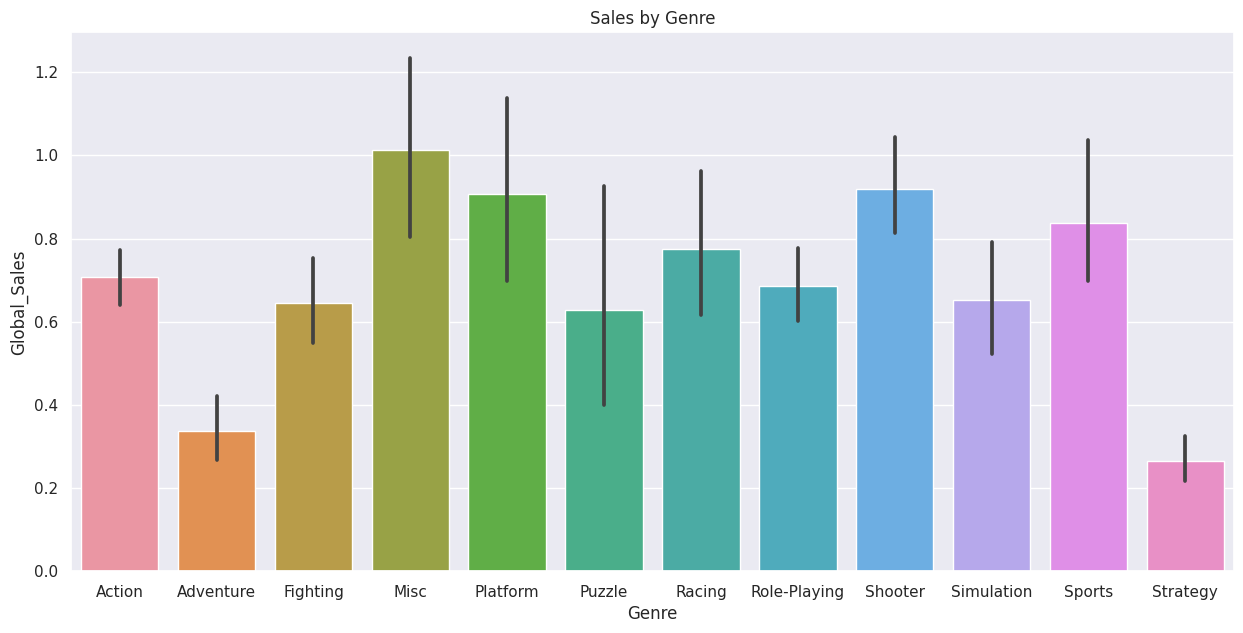

In [29]:
sales_genre=x.groupby(['Genre'],as_index=False)['Global_Sales'].sum().sort_values('Global_Sales',ascending=False)
sns.set(rc={"figure.figsize":(15,7)})
plt.title('Sales by Genre')
sns.barplot(data=x,x='Genre',y='Global_Sales')

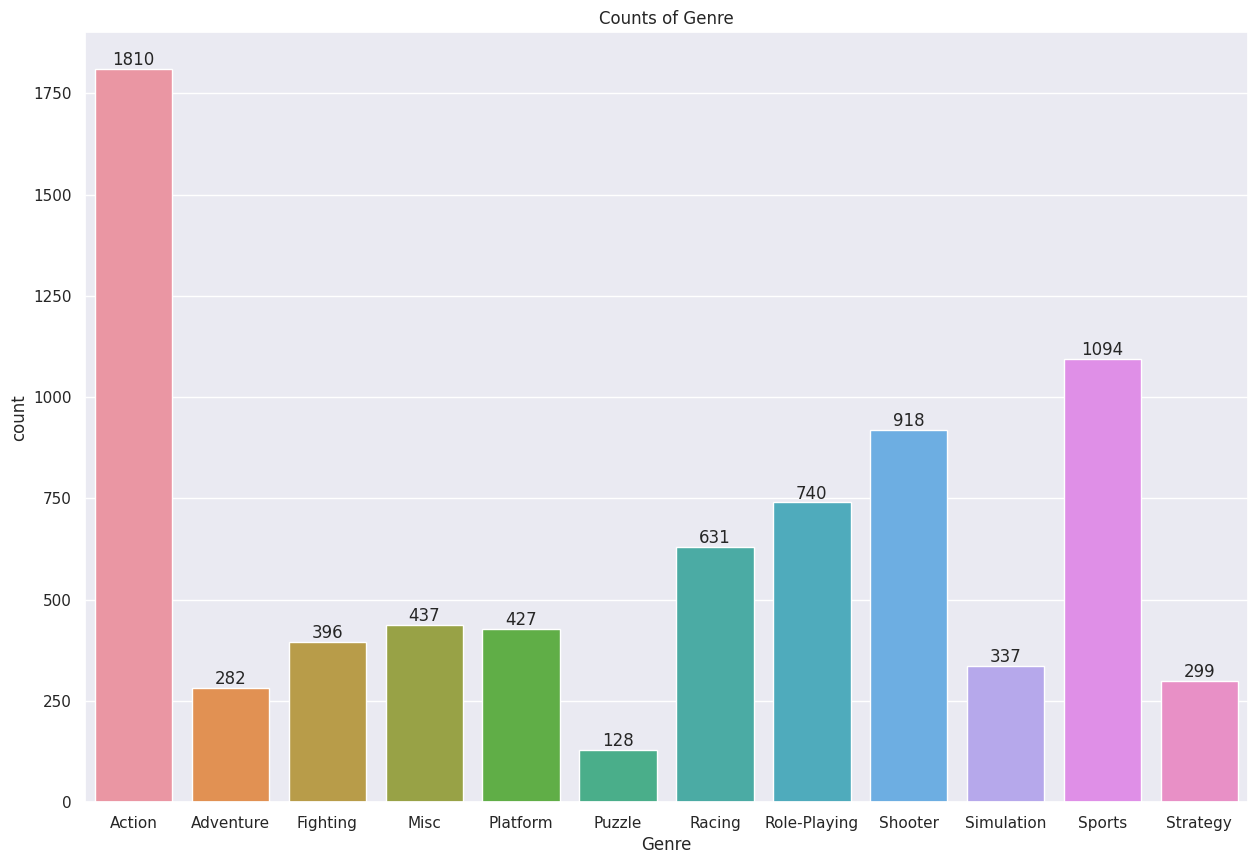

In [30]:
sns.set(rc={"figure.figsize":(15,10)})      #We have highest genre count of Action
ab=sns.countplot(x='Genre',data=x)
plt.title('Counts of Genre')
for bars in ab.containers:
    ab.bar_label(bars)

In [31]:
x['Publisher'].unique()

array(['Nintendo', 'Microsoft Game Studios', 'Take-Two Interactive',
       'Sony Computer Entertainment', 'Activision', 'Ubisoft',
       'Bethesda Softworks', 'Electronic Arts', 'SquareSoft',
       'GT Interactive', 'Konami Digital Entertainment', 'Square Enix',
       'Sony Computer Entertainment Europe', 'Virgin Interactive',
       'LucasArts', '505 Games', 'Warner Bros. Interactive Entertainment',
       'Capcom', 'Universal Interactive', 'RedOctane', 'Atari',
       'Eidos Interactive', 'Namco Bandai Games', 'Vivendi Games',
       'MTV Games', 'Disney Interactive Studios', 'Sega', 'THQ',
       'Acclaim Entertainment', 'Midway Games', 'Deep Silver', 'NCSoft',
       'Tecmo Koei', 'Valve Software', 'Infogrames', 'Mindscape', 'Valve',
       'Hello Games', 'Activision Value', 'Global Star', 'Gotham Games',
       'Crave Entertainment', 'Hasbro Interactive', 'Codemasters',
       'TDK Mediactive', 'Zoo Games', 'Sony Oznline Entertainment', 'RTL',
       'D3Publisher', 'Unknown', 

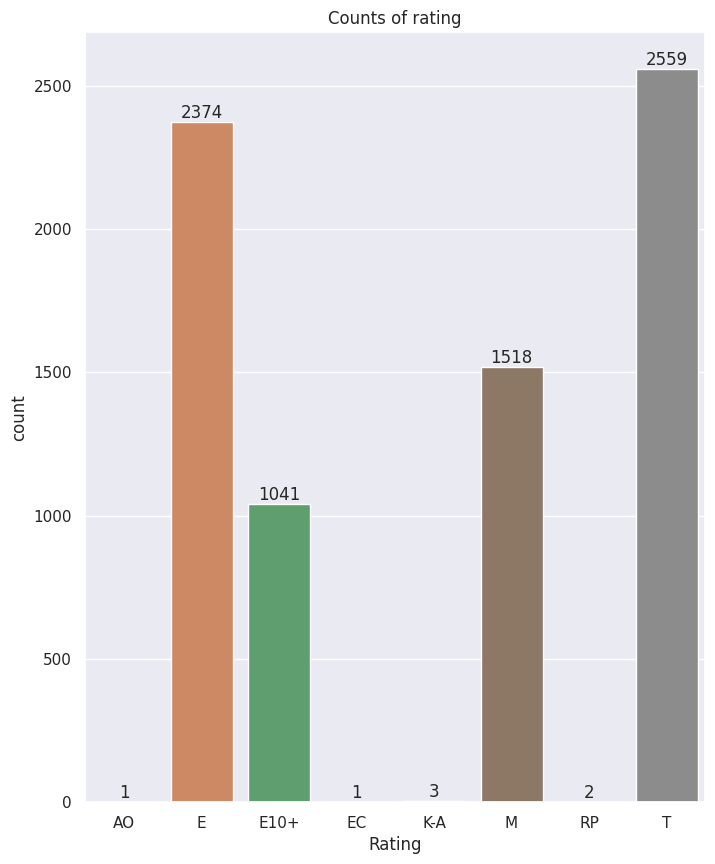

In [32]:
plt.figure(figsize=(8,10))
ax=sns.countplot(x,x='Rating')
plt.title('Counts of rating')
for bars in ax.containers:
    ax.bar_label(bars)

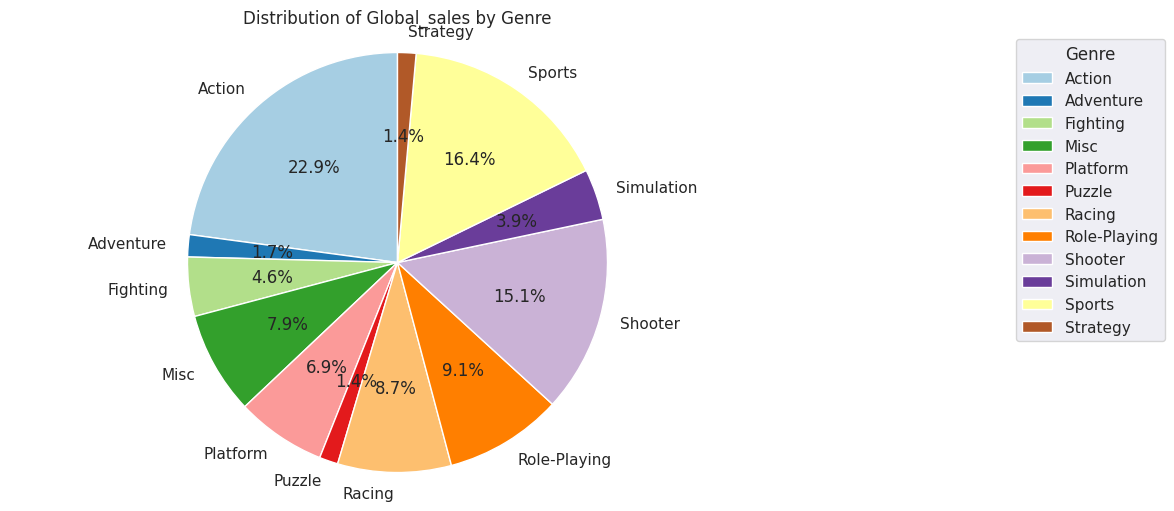

In [33]:
category_column = 'Genre'
salary_column = 'Global_Sales'

grouped_x = x.groupby(category_column)[salary_column].sum().reset_index()

plt.figure(figsize=(10, 6))
plt.pie(grouped_x[salary_column], labels=grouped_x[category_column], autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.axis('equal')  # Equal aspect ratio ensures that the pie is drawn as a circle.
plt.title('Distribution of Global_sales by Genre')

# Add legends
plt.legend(title='Genre', loc='upper right', bbox_to_anchor=(1, 0, 0.5, 1))

# Display the pie chart
plt.show()

Sure, here's a summary of the insights gathered from the analysis:

1. **Data Cleaning:**
   - Null values were dropped from the dataset.
   - Duplicate values were checked, and none were found.

2. **Data Exploration:**
   - The dataset contains information about video games, including their names, platforms, genres, publishers, sales figures, and ratings.
   - The dataset spans various years of release, with the earliest release dating back to 1980 and the latest to 2020.
   - The dataset includes different genres of games such as Sports, Racing, Platform, etc.
   - Publishers range from well-known companies like Nintendo, Microsoft Game Studios, to smaller ones.

3. **Top Insights:**
   - The game "Wii Sports" has the highest global sales, followed by "Mario Kart Wii" and "Wii Sports Resort".
   - Most of the games were released between the years 2005 and 2006.
   - The Action genre seems to be the most popular, followed by Sports and Misc.
   - Nintendo appears to be the leading publisher in terms of the number of games released.
   - Most games fall under the "E" (Everyone) and "T" (Teen) rating categories.

4. **Visualization:**
   - A bar plot was used to visualize the sales by genre, showing that Action games have the highest sales.
   - A count plot was used to visualize the counts of games by genre, revealing the distribution of different genres.
   - A pie chart was used to show the distribution of global sales by genre, highlighting the proportion of sales contributed by each genre.

Overall, the analysis provides insights into the video game industry, including popular genres, top-selling games, and key players in the market.